In [1]:
#1. ライブラリの読み込み 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
#from sklearn import datasets
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
np.random.seed(123)

In [2]:
#2. 活性化関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# シグモイド関数の微分(誤差逆伝搬用)
def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [3]:
#3. 単純パーセプトロン
class Layer(object):
    def __init__(self, input_dim, output_dim,
                 activation, dactivation):
        self.w = np.random.normal(size=(input_dim, output_dim))
        self.b = np.zeros(output_dim)
        self.activation = activation
        self.dactivation = dactivation

    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        self._input = x
        self._pre_activation = np.matmul(x, self.w) + self.b
        return self.activation(self._pre_activation)

    def backward(self, delta, W):
        delta = self.dactivation(self._pre_activation) \
                * np.matmul(delta, W.T)
        return delta

    def compute_gradients(self, delta):
        dW = np.matmul(self._input.T, delta)
        db = np.matmul(np.ones(self._input.shape[0]), delta)

        return dW, db

In [4]:
#4. データの準備
M = 2      # 入力データの次元
K = 3      # クラス数
n = 100    # クラスごとのデータ数
N = n * K  # 全データ数

x1 = np.random.randn(n, M) + np.array([0, 10])
x2 = np.random.randn(n, M) + np.array([5, 5])
x3 = np.random.randn(n, M) + np.array([10, 0])
t1 = np.array([[1, 0, 0] for i in range(n)])
t2 = np.array([[0, 1, 0] for i in range(n)])
t3 = np.array([[0, 0, 1] for i in range(n)])

x = np.concatenate((x1, x2, x3), axis=0)
t = np.concatenate((t1, t2, t3), axis=0)

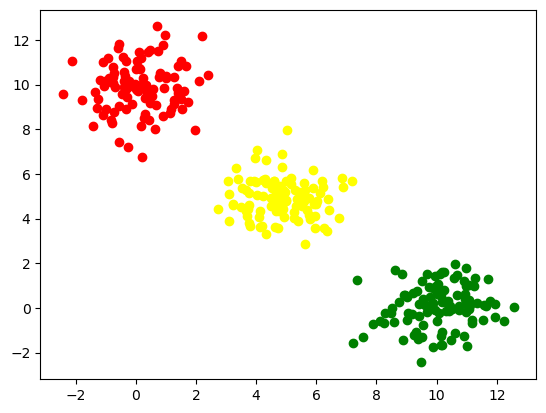

In [5]:
#5. データの表示
plt.scatter(x1[:,0],x1[:,1],color="red")
plt.scatter(x2[:,0],x2[:,1],color="yellow")
plt.scatter(x3[:,0],x3[:,1],color="green")
plt.show()

In [6]:
model = Layer(2, 3, activation=sigmoid,dactivation=dsigmoid)

In [7]:
#6. モデルの学習
def compute_loss(t, y):
    return (-t * np.log(y) - (1 - t) * np.log(1 - y)).sum()

def train_step(x, t):
    y = model(x)
    delta = y - t
    dW, db = model.compute_gradients(delta)
    model.w = model.w - 0.1 * dW
    model.b = model.b - 0.1 * db
    loss = compute_loss(t, model(x))
    return loss

In [8]:
#7. モデルの学習
epochs = 300
batch_size = 1
n_batches = x.shape[0] // batch_size

for epoch in range(epochs):
    train_loss = 0.
    x_, t_ = shuffle(x, t)

    for n_batch in range(n_batches):
        start = n_batch * batch_size
        end = start + batch_size

        train_loss += train_step(x_[start:end],
                                 t_[start:end])

    if epoch % 10 == 0 or epoch == epochs - 1:
        print('epoch: {}, loss: {:.3f}'.format(
            epoch+1,
            train_loss
        ))

epoch: 1, loss: 55.026
epoch: 11, loss: 49.416
epoch: 21, loss: 39.253
epoch: 31, loss: 37.309
epoch: 41, loss: 36.862
epoch: 51, loss: 39.835
epoch: 61, loss: 38.524
epoch: 71, loss: 41.744
epoch: 81, loss: 41.255
epoch: 91, loss: 38.889
epoch: 101, loss: 47.662
epoch: 111, loss: 38.375
epoch: 121, loss: 36.153
epoch: 131, loss: 39.298
epoch: 141, loss: 35.981
epoch: 151, loss: 40.220
epoch: 161, loss: 36.697
epoch: 171, loss: 40.175
epoch: 181, loss: 44.531
epoch: 191, loss: 46.020
epoch: 201, loss: 39.235
epoch: 211, loss: 39.796
epoch: 221, loss: 41.514
epoch: 231, loss: 46.898
epoch: 241, loss: 36.847
epoch: 251, loss: 42.191
epoch: 261, loss: 43.168
epoch: 271, loss: 41.589
epoch: 281, loss: 42.293
epoch: 291, loss: 39.146
epoch: 300, loss: 48.087


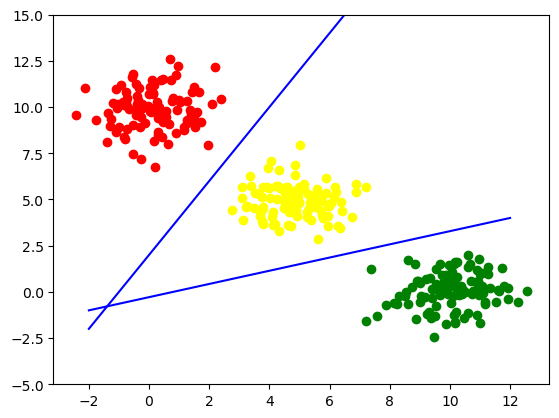

In [9]:
#8.結果とニューロンの状態を表示する
rx = np.array([-2,12])
ry = np.array([[0,0],[0,0]])
for i in range(rx.size):
    ry[0][i] = ((model.w[0][2] - model.w[0][1])*rx[i] + model.b[2] - model.b[1]) / (model.w[1][1] - model.w[1][2])
    ry[1][i] = ((model.w[0][0] - model.w[0][1])*rx[i] + model.b[0] - model.b[1]) / (model.w[1][1] - model.w[1][0])
plt.scatter(x1[:,0],x1[:,1],color="red")
plt.scatter(x2[:,0],x2[:,1],color="yellow")
plt.scatter(x3[:,0],x3[:,1],color="green")
plt.plot(rx,ry[0],color="blue")
plt.plot(rx,ry[1],color="blue")
plt.ylim(-5,15)
plt.show()